In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
#Importamos la data
base = pd.read_csv('DSventa_F.csv')
base.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
ID             400 non-null int64
SEXO           400 non-null object
EDAD           387 non-null float64
INGRESOS       400 non-null int64
ESTADOCIVIL    392 non-null object
FLAG_COMPRA    400 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 18.8+ KB


In [5]:
base.describe()

,ID,EDAD,INGRESOS,FLAG_COMPRA
count,400.000000,387.000000,400.000000,400.000000
mean,10200.500000,37.589147,6476.500000,0.357500
std,115.614301,10.523312,7705.031897,0.479864
min,10001.000000,18.000000,1200.000000,0.000000
25%,10100.750000,29.000000,3500.000000,0.000000
50%,10200.500000,37.000000,5800.000000,0.000000
75%,10300.250000,46.000000,7300.000000,1.000000
max,10400.000000,60.000000,90000.000000,1.000000


In [6]:
features = list(base.columns.drop('FLAG_COMPRA').drop('ID'))
#Verificamos la cantidad de datos y los nulos
print ('Cantidad de datos: ',len(base))
print ('Nulos:')
print (base.isnull().sum())

Cantidad de datos:  400
Nulos:
ID              0
SEXO            0
EDAD           13
INGRESOS        0
ESTADOCIVIL     8
FLAG_COMPRA     0
dtype: int64


### Imputar nulos

In [7]:
base.EDAD.fillna(round(base.EDAD.mean(),0),inplace = True)

In [8]:
# Estado civil
base.ESTADOCIVIL.value_counts()

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

In [9]:
base.ESTADOCIVIL.fillna('S',inplace = True)

### Clasificación de variables

In [10]:
num_features = list(base[features].describe().columns)
cat_features = list(base[features].drop(num_features, axis=1).columns)
print ('Variables Numericas')
print (num_features)
print ('\nVariables Categoricas')
print (cat_features)

Variables Numericas
['EDAD', 'INGRESOS']

Variables Categoricas
['SEXO', 'ESTADOCIVIL']


In [11]:
for feature in cat_features:
    print ("-" * 40)
    print(base.groupby(feature, axis = 0)[feature].count().sort_values(ascending = False))

----------------------------------------
SEXO
F    204
M    196
Name: SEXO, dtype: int64
----------------------------------------
ESTADOCIVIL
S    222
C    125
D     53
Name: ESTADOCIVIL, dtype: int64


### Graficos

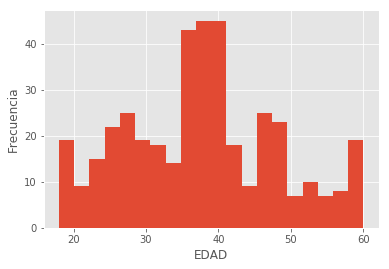

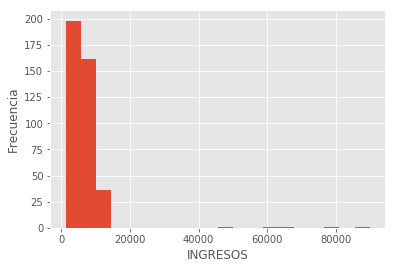

In [12]:
# ambas categorias son cardinales

import matplotlib.pyplot as plt
for feature in num_features:
    base[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

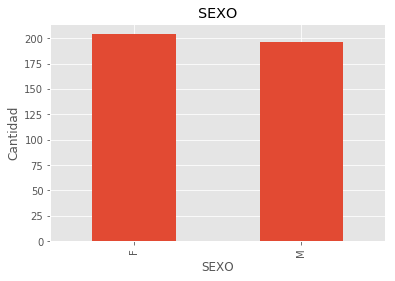

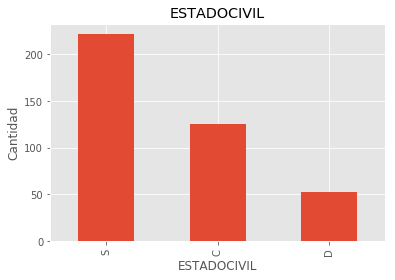

In [13]:
for feature in cat_features:
    var = base.groupby(feature)[feature].count().sort_values(ascending = False)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Cantidad')
    ax1.set_title(feature)
    var.plot(kind='bar')
    plt.show()

In [14]:
yes = base[base.FLAG_COMPRA == 1]
print (yes.shape)
yes.head()

(143, 6)


,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
7,10008,F,32.0,80000,C,1
16,10017,M,47.0,2000,S,1
17,10018,M,45.0,2100,S,1
18,10019,M,46.0,2300,S,1
19,10020,F,48.0,2400,S,1


In [15]:
nope = base[base.FLAG_COMPRA == 0]
print (nope.shape)
nope.head()

(257, 6)


,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


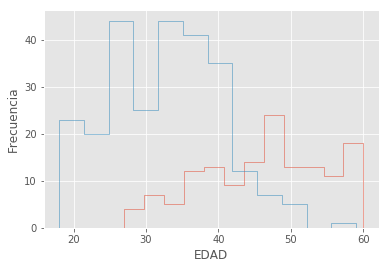

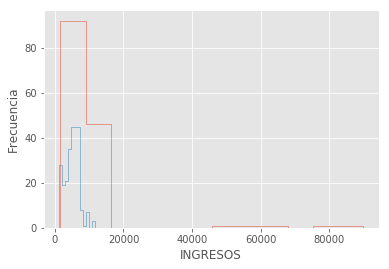

In [16]:
for feature in num_features:
    #plt.figure(figsize=(10, 8))
    plt.hist(yes[~yes[feature].isnull()][feature], 12, facecolor='blue', label='yes', histtype='step')
    plt.hist(nope[~nope[feature].isnull()][feature], 12, facecolor='red', label='no', histtype='step')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

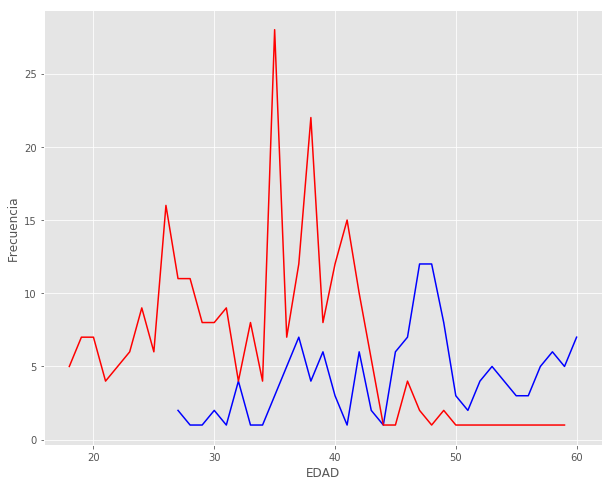

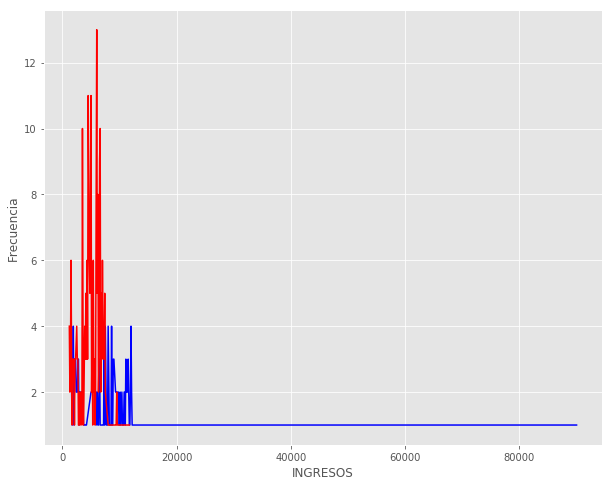

In [17]:
for feature in num_features:
    plt.figure(figsize=(10, 8))
    i=pd.Series(yes[~yes[feature].isnull()][feature].unique()).sort_values()
    f=yes.groupby(feature)['FLAG_COMPRA'].count()
    plt.plot(i,f,'b')
    i=pd.Series(nope[~nope[feature].isnull()][feature].unique()).sort_values()
    f=nope.groupby(feature)['FLAG_COMPRA'].count()
    plt.plot(i,f,'r')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

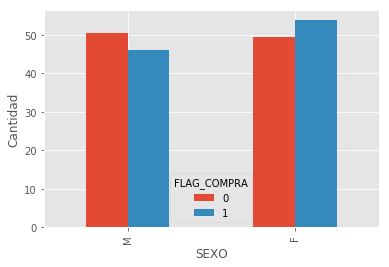

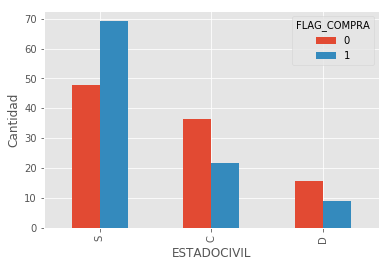

In [18]:
for feature in cat_features:
    var = pd.crosstab(index=base[feature], columns=base['FLAG_COMPRA']).apply(lambda r: r/r.sum()*100,axis=0).sort_values(0,ascending = False)
    var.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.show()

### Revision de Outliers

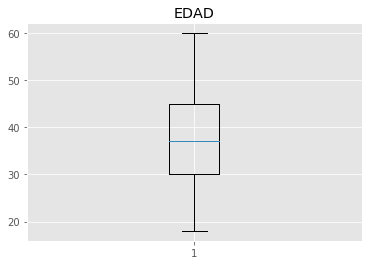

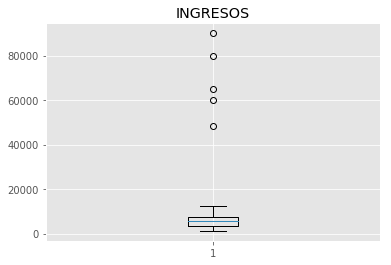

In [19]:
#Diagrama de Cajas
for feature in num_features:
    plt.boxplot(base[feature])
    plt.title(feature)
    plt.show()

In [20]:
# verificamos los percentiles
vector_percentiles = [0,10,50,90,95,99,100]
for feature in num_features:
    per = np.nanpercentile(base[feature],vector_percentiles)
    print(feature,per)

EDAD [ 18.  24.  37.  52.  57.  60.  60.]
INGRESOS [  1200.   2100.   5800.  10100.  11405.  48615.  90000.]


In [21]:
# Reemplazamos los outliers
valor_p95 = np.nanpercentile(base['INGRESOS'],95)
base.loc[base['INGRESOS']>valor_p95,'INGRESOS'] = valor_p95

In [22]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
ID             400 non-null int64
SEXO           400 non-null object
EDAD           400 non-null float64
INGRESOS       400 non-null float64
ESTADOCIVIL    400 non-null object
FLAG_COMPRA    400 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.8+ KB


In [23]:
# Copiamos la tabla base a data
data = base.copy()

### Conversión de categoricos

In [24]:
data['SEXO'].unique()

array(['M', 'F'], dtype=object)

In [25]:
dict_temp = {'M':1,'F':0}
data.SEXO = data.SEXO.map(dict_temp)

In [26]:
data.ESTADOCIVIL.unique()

array(['S', 'C', 'D'], dtype=object)

In [27]:
estado_dummies = pd.get_dummies(data.ESTADOCIVIL,prefix='Est',drop_first = True)
data = pd.concat([data,estado_dummies],axis=1)
data.drop('ESTADOCIVIL',axis= 1, inplace = True)
data.head()

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,Est_D,Est_S
0,10001,1,19.0,1500.0,0,0,1
1,10002,1,35.0,1600.0,0,0,0
2,10003,0,26.0,3500.0,0,0,0
3,10004,0,27.0,4700.0,0,0,0
4,10005,1,19.0,6300.0,0,0,1


## Modelado

In [28]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3, random_state=99)

In [29]:
features = list(data.columns)
features

['ID', 'SEXO', 'EDAD', 'INGRESOS', 'FLAG_COMPRA', 'Est_D', 'Est_S']

In [30]:
vars_to_model = ['SEXO', 'EDAD', 'INGRESOS', 'Est_D', 'Est_S']
target = 'FLAG_COMPRA'

In [31]:
X_train = data_train[vars_to_model]
y_train = data_train[target]
X_test = data_test[vars_to_model]
y_test = data_test[target]

### Arbol de decision

In [33]:
from sklearn import tree
tree.DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
model = tree.DecisionTreeClassifier(random_state = 99, max_depth=4)#, min_samples_leaf = 30)
model.fit(X_train,y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

### Metricas Train

In [35]:
from sklearn import metrics as mt
print('Matriz de Confusion')
cm = mt.confusion_matrix(y_train,pred_train)
print (cm)

Matriz de Confusion
[[169   5]
 [ 10  96]]


In [36]:
acc = mt.accuracy_score(y_train,pred_train)
print('Accuracy: ',acc)

Accuracy:  0.946428571429


In [37]:
auc = mt.roc_auc_score(y_train,pred_train_prob[:,1])
print('roc - auc: ',auc)

roc - auc:  0.982379093472


### Metricas Testing

In [38]:
print('Matriz de Confusion - Test:')
cm = mt.confusion_matrix(y_test,pred_test)
print (cm)

Matriz de Confusion - Test:
[[81  2]
 [ 6 31]]


In [39]:
acc = mt.accuracy_score(y_test,pred_test)
print('Accuracy: ',acc)

Accuracy:  0.933333333333


In [40]:
auc = mt.roc_auc_score(y_test,pred_test_prob[:,1])
print('roc - auc: ',auc)

roc - auc:  0.972647346141


In [41]:
classifier = tree.DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print ('Entrenamiento',train_score)
print ('Validacion',test_score)

Entrenamiento 1.0
Validacion 0.891666666667
